# <font color='green'>Lending Club Case Study</font>

#### Group Members: 
1. Priya Aggarwal
2. Shubham Gupta

### Project Brief
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.


<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


### Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



##  Imoprting Essential Libraries & Loading Data-set

In [1]:
#Libraries for data loading/reading
import numpy as np
import pandas as pd

#Ignore unnecssary warnings
import warnings 
warnings.filterwarnings('ignore')

#Pandas options
pd.set_option('display.max_rows',30)
pd.set_option('display.max_columns',50)

#Libraries for visualizatoins
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Setting color and theme for visualization
sns.set_style('darkgrid') 
sns.set_palette('pastel')

In [2]:
loan_data=pd.read_csv('loan.csv')

## Data Cleaing

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

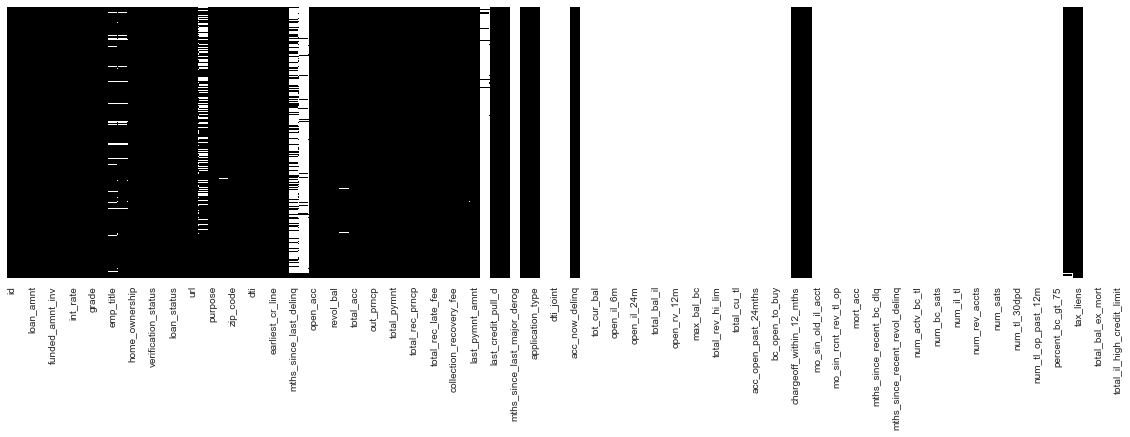

In [5]:
plt.figure(figsize=(20,5))
sns.heatmap(loan_data.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')
plt.show()

In [6]:
nuni=loan_data.nunique()
nuni[nuni==0] #nuni==0 means null data

mths_since_last_major_derog    0
annual_inc_joint               0
dti_joint                      0
verification_status_joint      0
tot_coll_amt                   0
                              ..
percent_bc_gt_75               0
tot_hi_cred_lim                0
total_bal_ex_mort              0
total_bc_limit                 0
total_il_high_credit_limit     0
Length: 54, dtype: int64

___Dropping all null columns___

In [7]:
loan_data=loan_data.drop(columns=nuni[nuni==0].index)

In [8]:
loan_data.shape

(39717, 57)

In [9]:
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [11]:
loan_data.nunique()

id                          39717
member_id                   39717
loan_amnt                     885
funded_amnt                  1041
funded_amnt_inv              8205
                            ...  
acc_now_delinq                  1
chargeoff_within_12_mths        1
delinq_amnt                     1
pub_rec_bankruptcies            3
tax_liens                       1
Length: 57, dtype: int64

___There are `3` type of features available in the dataset :___
1. Features that would be unavailble during the loan application
2. Features that have only one unique value in entire columns.
3. Features with high cardinality 

_Dropping all these features_

In [12]:
loan_data=loan_data.drop(columns=['url','member_id','emp_title','funded_amnt_inv','pymnt_plan','desc',
                                  'title','zip_code','revol_bal','revol_util','initial_list_status','out_prncp','out_prncp_inv',
                                  'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                                  'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',
                                  'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type',
                                  'chargeoff_within_12_mths','delinq_amnt','tax_liens','acc_now_delinq'])

In [13]:
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,9,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,4,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,10,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,37,0.0
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,38,0.0


___Correcting datatype___

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

In [15]:
loan_data.id=loan_data.id.astype(str) #ID should be object not integer
loan_data.term=loan_data.term.apply(lambda x: int(x.replace('months',''))) #Term as integer value
loan_data.int_rate=loan_data.int_rate.apply(lambda x: float(x.rstrip('%'))) # Interest rate as float value
loan_data.issue_d=pd.DatetimeIndex(loan_data.issue_d.apply(lambda x: x.replace('-','-20'))).date #Date

In [16]:
loan_data.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,22.088828,0.043260
std,7456.670694,7187.238670,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,11.401709,0.204324
min,500.000000,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,13.000000,0.000000
50%,10000.000000,9600.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,20.000000,0.000000
75%,15000.000000,15000.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,29.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,90.000000,2.000000


In [17]:
loan_data.describe(exclude=np.number)

,id,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line
count,39717,39717,39717,38642,39717,39717,39717,39717,39717,39717,39717
unique,39717,7,35,11,5,3,55,3,14,50,526
top,1014729,B,B3,10+ years,RENT,Not Verified,2011-12-20,Fully Paid,debt_consolidation,CA,Nov-98
freq,1,12020,2917,8879,18899,16921,2260,32950,18641,7099,370


As we have to analyze and find the diffrence between; `Fully Paid Loan` and `Charged Off loan`, and we are not intrested on `Current Loan` So :

Changing loan_status in boolean format : `Fully_Paid`=1 & `Charged_Off`=0 <br>
Dropping data where loan_status = `Current`

In [18]:
loan_data.loan_status=loan_data.loan_status.apply(lambda x : 1 if x=='Fully Paid' else (0 if x=='Charged Off' else np.nan))
loan_data=loan_data[~loan_data.loan_status.isnull()]

In [19]:
loan_data.shape

(38577, 26)

### Handling Missing Values

In [20]:
loan_data.isnull().sum()[loan_data.isnull().sum()>0]

emp_length                 1033
mths_since_last_delinq    24905
mths_since_last_record    35837
pub_rec_bankruptcies        697
dtype: int64

___emp_length___

In [21]:
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

we will impute value with it's mode, and will convert it into integer value; <br>
Less than a year employment will be equal to zero.

In [22]:
loan_data.emp_length=loan_data.emp_length.fillna(loan_data.emp_length.mode()[0])#Employment length with its mode
loan_data.emp_length=loan_data.emp_length.apply(lambda x: 0 if x=='< 1 year' else int(x.strip(' +years')))

In [23]:
loan_data.pub_rec_bankruptcies=loan_data.pub_rec_bankruptcies.fillna(0) #Zero if there is no record of bankruptcies

Droping other 2 columns, there are more than 90% missing value.

In [24]:
loan_data=loan_data.drop(columns=['mths_since_last_delinq','mths_since_last_record'])

### Skewness handling

In [25]:
loan_data.skew()

id                       0.117022
loan_amnt                1.078103
funded_amnt              1.103828
term                     1.181032
int_rate                 0.293627
installment              1.150486
emp_length               0.161146
annual_inc              31.198414
loan_status             -2.006685
dti                     -0.026842
delinq_2yrs              5.033279
inq_last_6mths           1.384390
open_acc                 1.007288
pub_rec                  4.519991
total_acc                0.832481
pub_rec_bankruptcies     4.570792
dtype: float64

___As we can see Annual income data is highly skewed ~31.<br>
So to handle this, I'm using log transform and creating another column.___

In [26]:
loan_data['annual_inc_log']=np.log(loan_data.annual_inc)

In [27]:
loan_data.annual_inc_log.skew()

0.13203203211650413

___Skewness dropped from ~31 to ~0.13, which is good.___

## Data Exploration

### Univariate Analysis

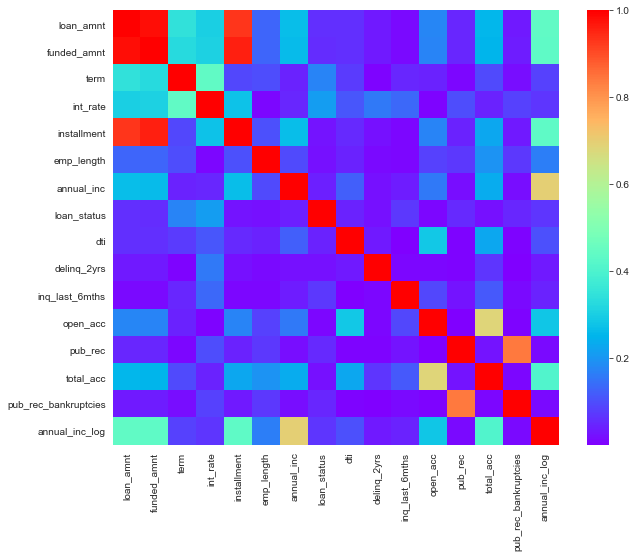

In [28]:
#Before data exploration lets plot heatmap correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(abs(loan_data.corr()), cmap='rainbow')
plt.show()

__Let's check distribution of Loan amount first__

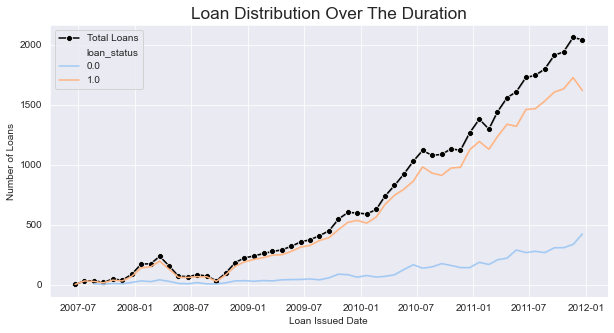

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=loan_data, x='issue_d', y='id', estimator=len, label='Total Loans', marker="o", color='black')
sns.lineplot(data=loan_data, x='issue_d', y='id', hue='loan_status', estimator=len)
plt.legend()
plt.title('Loan Distribution Over The Duration', fontdict={'fontsize' : 'xx-large'})
plt.xlabel('Loan Issued Date')
plt.ylabel('Number of Loans')
plt.show()

###### Loan Status

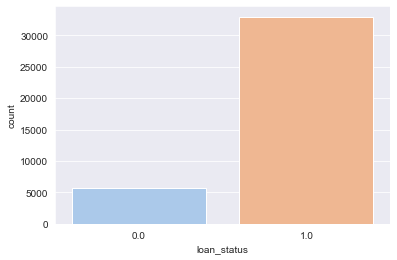

In [30]:
sns.countplot(x= loan_data["loan_status"])
plt.show()

___Most of the loans are fully paid. % of changed_off is very low.___

### loan_amount

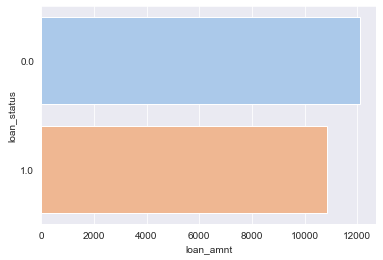

In [31]:
# plt.figure(figsize=(10,5))
sns.barplot(data=loan_data, y='loan_status', x='loan_amnt',ci=None, orient='h')
plt.show()

In [32]:
loan_data.groupby('loan_status').loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0.0,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
1.0,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


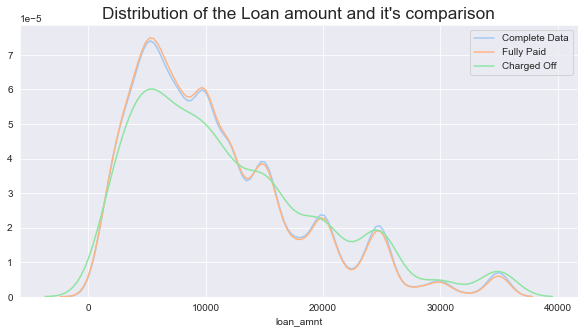

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(loan_data.loan_amnt, bins=20, hist=False, label='Complete Data')
sns.distplot(loan_data[loan_data.loan_status==1].loan_amnt, bins=20, hist=False, label='Fully Paid')
sns.distplot(loan_data[loan_data.loan_status==0].loan_amnt, bins=20, hist=False, label='Charged Off')
plt.title('Distribution of the Loan amount and it\'s comparison', fontdict={'fontsize' : 'xx-large'})
plt.legend()
plt.show()

___Both type of loans (Fully Paid & Charged Off) have same distribution.___

### term

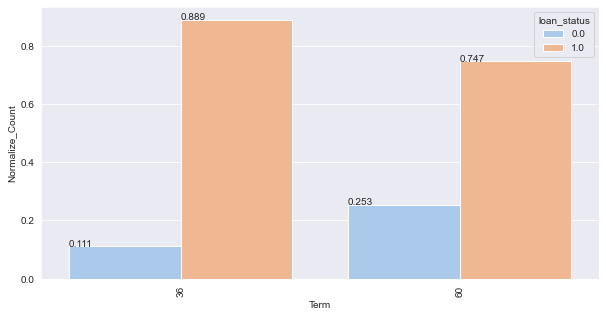

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
Term=loan_data.groupby('term').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
Term_bar=sns.barplot(data=Term, x='term', y='Normalize_Count', hue='loan_status')
for i in Term_bar.patches :
    Term_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.xlabel('Term')
plt.show()

___Loans with 5 year period are more likely to default as compare to 3 year period loan___

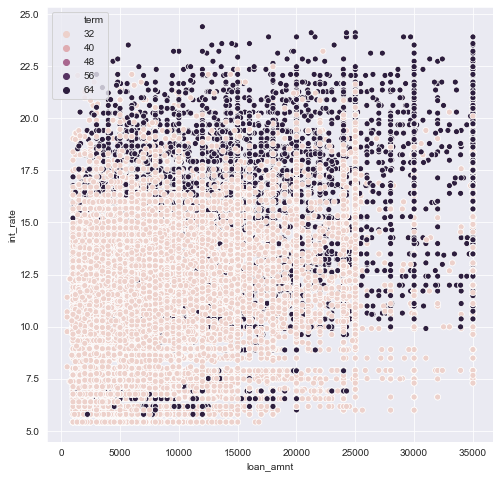

In [35]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=loan_data, x='loan_amnt', y='int_rate', hue='term')
plt.show()

Clearly we can see that there are two groups, as the loan amount or the interest rate increases,then loan term is for 5 years, but still there are some outliers, i.e low interest rate and loan amount but for the term of 5 years.<br>
__Higher the Loan amount = Higher the Intrest rate__

### int_rate

In [36]:
loan_data.groupby('loan_status').int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0.0,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
1.0,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


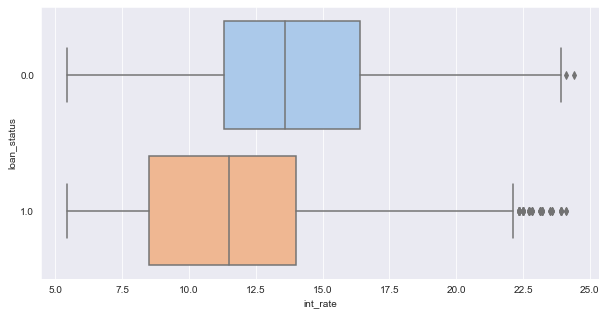

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data, y='loan_status', x='int_rate', orient='h')
plt.show()

___High intrest rate loans are most likely to default as comapre to low intrest loans.___ 

### grade/sub_grade

<Figure size 576x576 with 0 Axes>

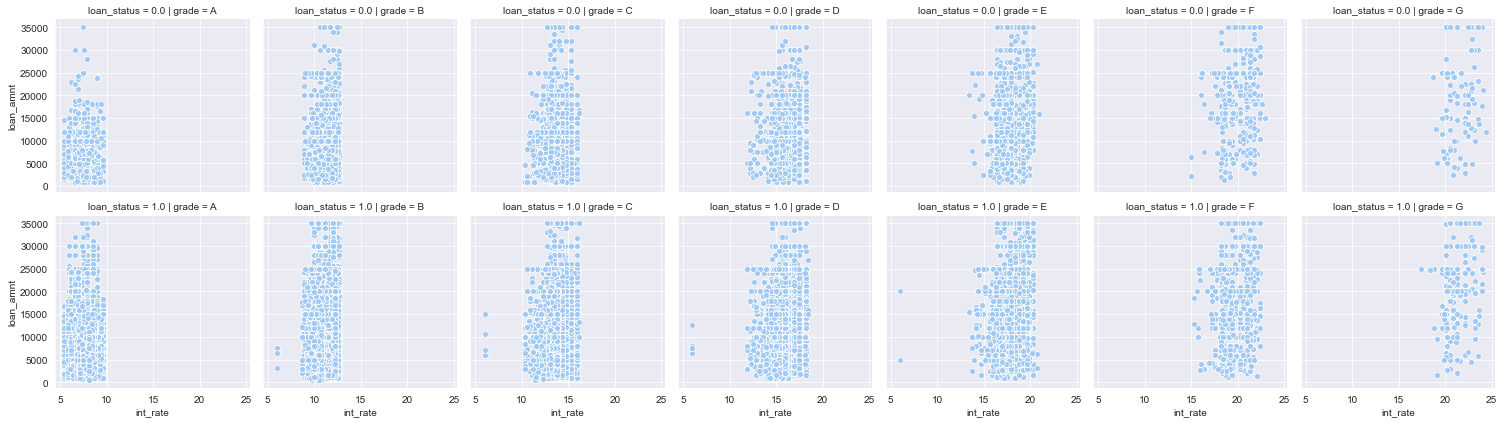

In [38]:
plt.figure(figsize=(8,8))
ax=sns.FacetGrid(data=loan_data, col='grade', row='loan_status', col_order=sorted(loan_data.grade.unique()))
ax.map(sns.scatterplot, 'int_rate', 'loan_amnt')
#sns.scatterplot(data=loan_data, x='int_rate',y='loan_amnt', hue='loan_status')
plt.show()

__It seems like diffrent grade forming cluster in interest rate in interval. Let's look this in boxplot.__

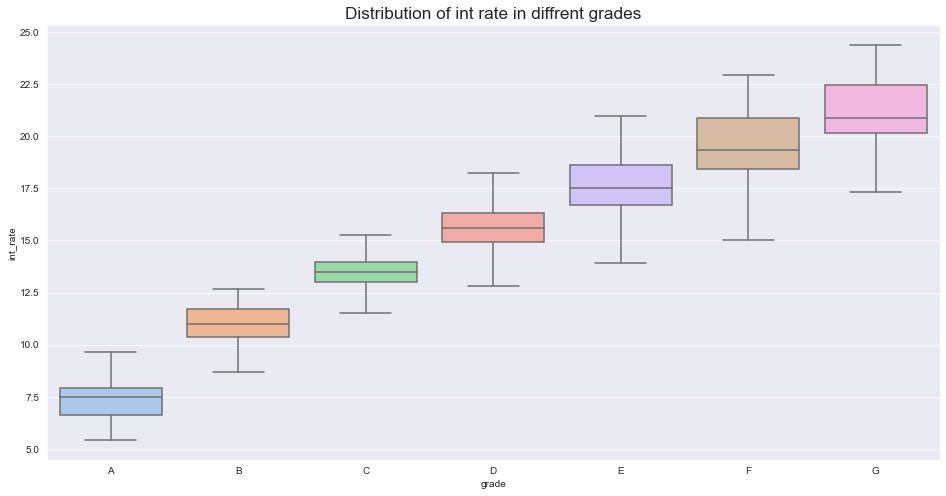

In [39]:
plt.figure(figsize=(16,8))
sns.boxplot(data=loan_data, x='grade', y='int_rate', showfliers=False, order=sorted(loan_data.grade.unique()))
plt.title('Distribution of int rate in diffrent grades', fontdict={'fontsize' : 'xx-large'})
plt.show()

__Lower the Grade Higher the interest rate__

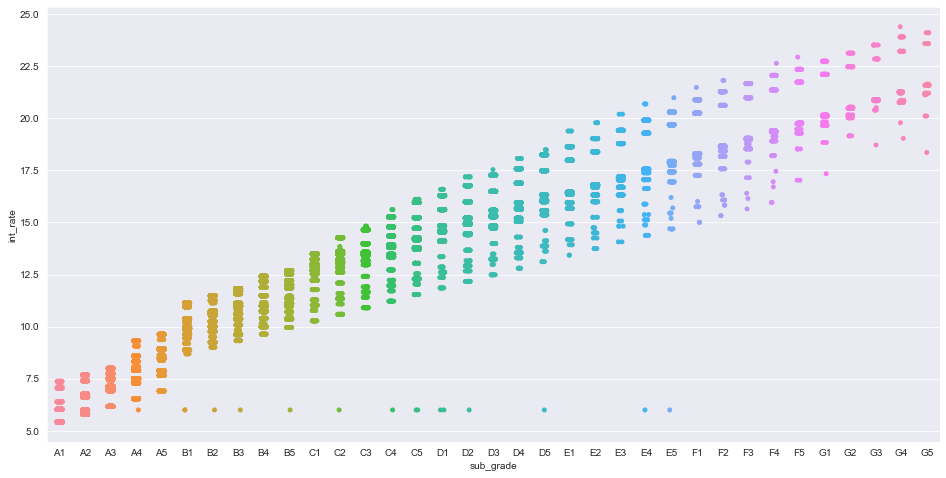

In [40]:
plt.figure(figsize=(16,8))
sns.stripplot(data=loan_data, x='sub_grade', y='int_rate', order=sorted(list(loan_data.sub_grade.unique())))
plt.show()

___Grade/Sub-Grade is highly corr with int_rate___

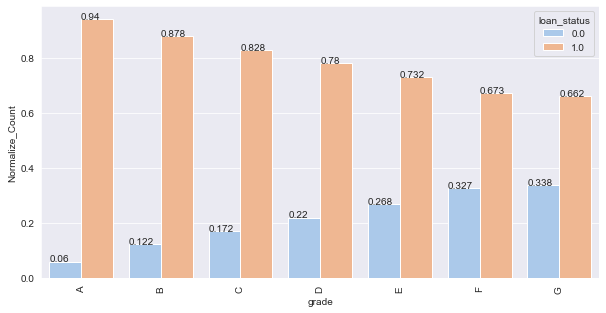

In [41]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
Grade=loan_data.groupby('grade').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
Grade_bar=sns.barplot(data=Grade, x='grade', y='Normalize_Count', hue='loan_status')
for i in Grade_bar.patches :
    Grade_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

___Lower the Grade (A; Higher & G; Lower) higher the chance of defaulting of loan___ <br>
we can also drop the grade/sub_grade columns as we know that Grades are just the bins of int_rate, or we can say, depend upon each other (Highly correlated).

### emp_length

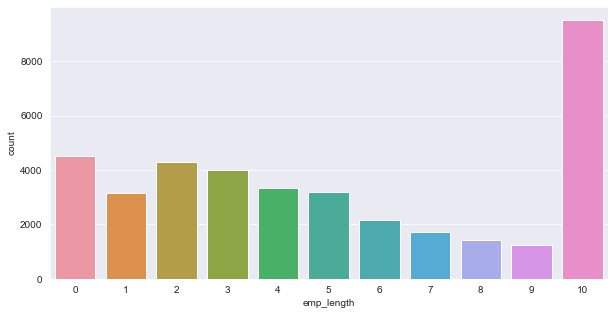

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(loan_data['emp_length'], order=sorted(loan_data.emp_length.unique()))
plt.show()

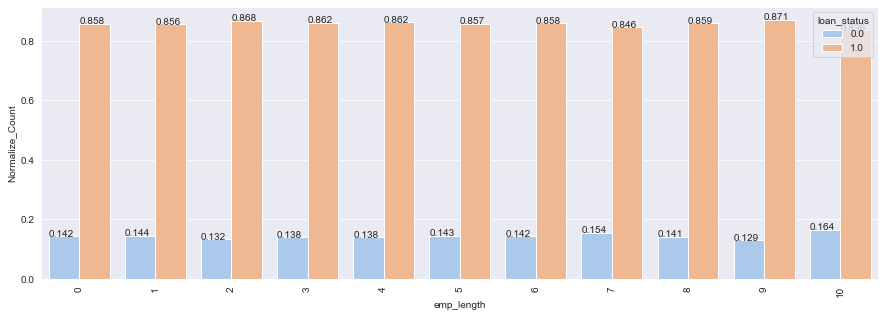

In [43]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
emp_length=loan_data.groupby('emp_length').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
emp_length_bar=sns.barplot(data=emp_length, x='emp_length', y='Normalize_Count', hue='loan_status')
for i in emp_length_bar.patches :
    emp_length_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

___Not much effect of employment length on loan defaulting___

### home_ownership

In [44]:
loan_data.groupby('home_ownership').loan_status.value_counts(normalize=True)

home_ownership  loan_status
MORTGAGE        1.0            0.863287
                0.0            0.136713
NONE            1.0            1.000000
OTHER           1.0            0.816327
                0.0            0.183673
OWN             1.0            0.851092
                0.0            0.148908
RENT            1.0            0.846374
                0.0            0.153626
Name: loan_status, dtype: float64

In [45]:
# Replcing None with Other
loan_data.home_ownership=loan_data.home_ownership.replace(['NONE'],['OTHER'])

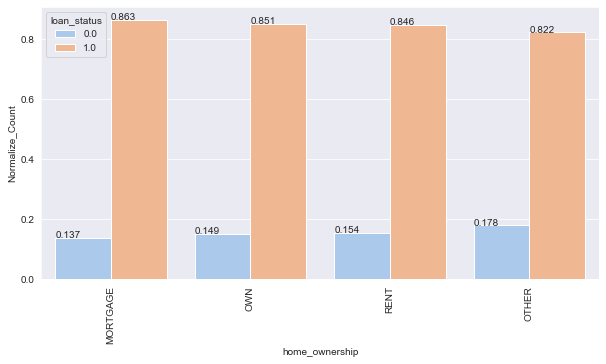

In [46]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
home=loan_data.groupby('home_ownership').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
home_bar=sns.barplot(data=home, x='home_ownership', y='Normalize_Count', hue='loan_status')
for i in home_bar.patches :
    home_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

___Borrower who owns the house, or borrowed money for home, are less likely to default the loan.___ 

### annual_inc

In [47]:
# plt.figure(figsize=(8,8))
# ax=sns.FacetGrid(data=loan_data, col='annual_inc', row='loan_status', col_order=sorted(loan_data.annual_inc.unique()))
# ax.map(sns.scatterplot, 'loan_amnt', 'annual_inc')
# #sns.scatterplot(data=loan_data, x='int_rate',y='loan_amnt', hue='loan_status')
# plt.show()


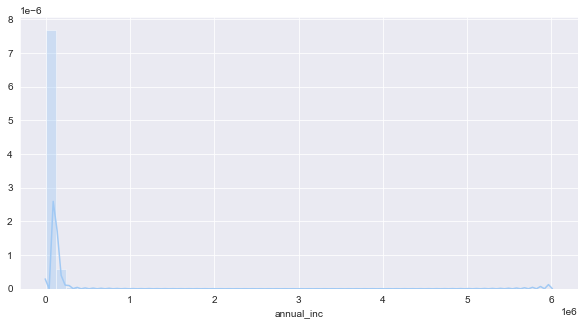

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc)
plt.show()

___Annual Income is highly skewed so to reduce skewness, we took a log transform, and results are as below.___

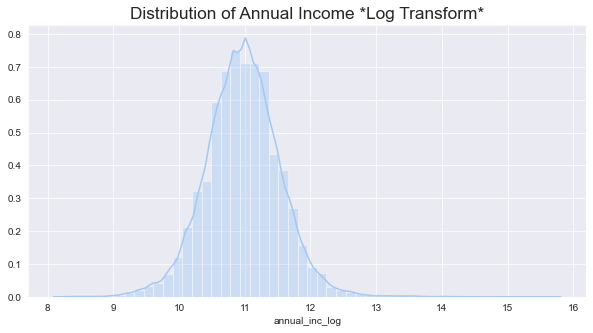

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc_log) # after removing skewness
plt.title('Distribution of Annual Income *Log Transform*', fontdict={'fontsize' : 'xx-large'})
plt.show()

___As in correlation matrix, we saw that annual_inc_log is highly correlated with loan_amnt and tottal_acc, let's have a look.___

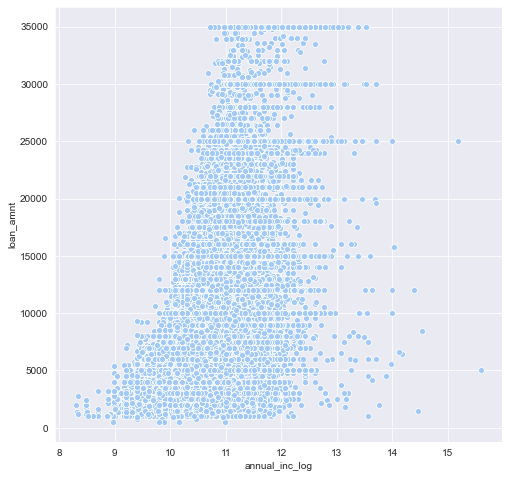

In [50]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=loan_data, x='annual_inc_log', y='loan_amnt')
plt.show()

from plot we can infer that, If your annual income is less, you can't afford high loan ammount, totally depends upon capablity.

___Annual Income is also correlated with Total Account. Let's visualize it.___

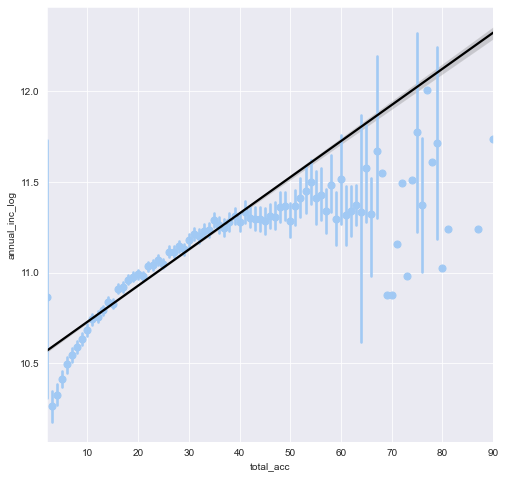

In [51]:
plt.figure(figsize=(8,8))
sns.regplot(data=loan_data, y='annual_inc_log', x='total_acc', x_estimator=np.mean, line_kws={'color':'black'})
plt.show()

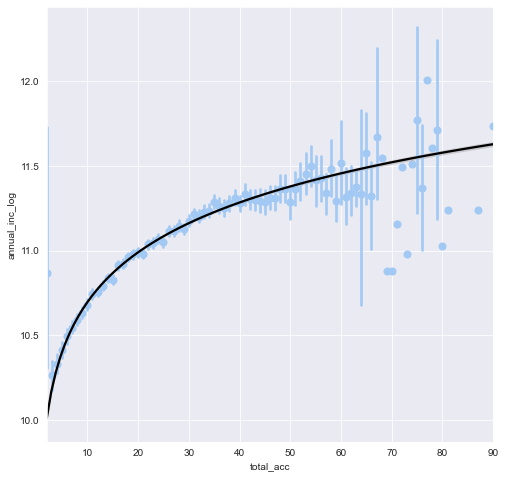

In [52]:
plt.figure(figsize=(8,8))
sns.regplot(data=loan_data, y='annual_inc_log', x='total_acc', x_estimator=np.mean, logx=True, line_kws={'color':'black'})
plt.show()

___when I tried to plot regression between Annual income(Log Transform) & and total account, It seems like there is log realtionship.___

___Regreesion (Curve) accurately fittling between total account and Annual Income.___
We can infer that people who have high annual income have high number of accounts.


### pub_rec_bankruptcies

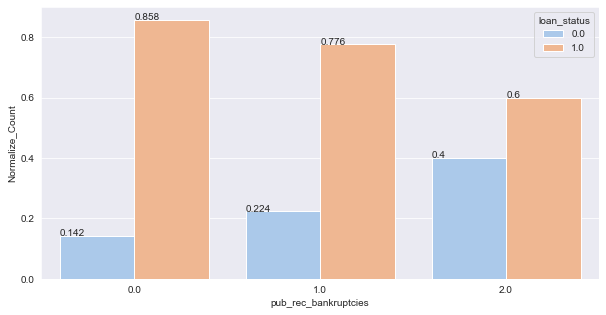

In [53]:
plt.figure(figsize=(10,5))
bankrup=loan_data.groupby('pub_rec_bankruptcies').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
bankrup_bar=sns.barplot(data=bankrup, x='pub_rec_bankruptcies', y='Normalize_Count', hue='loan_status')
for i in bankrup_bar.patches :
    bankrup_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

___If a person has record of bankruptcies, He is most likely to default___ 

### verification_status

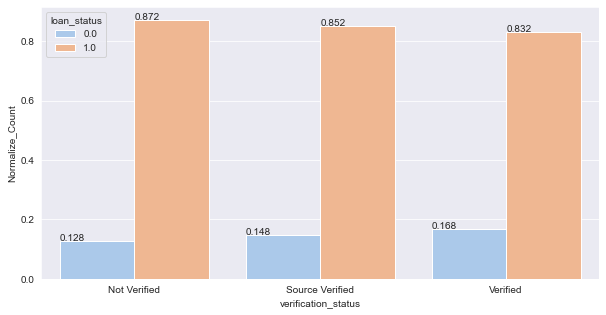

In [54]:
plt.figure(figsize=(10,5))
verify=loan_data.groupby('verification_status').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
verify_bar=sns.barplot(data=verify, x='verification_status', y='Normalize_Count', hue='loan_status')
for i in verify_bar.patches :
    verify_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

___Not much effect of Income source verification___

### pub_rec

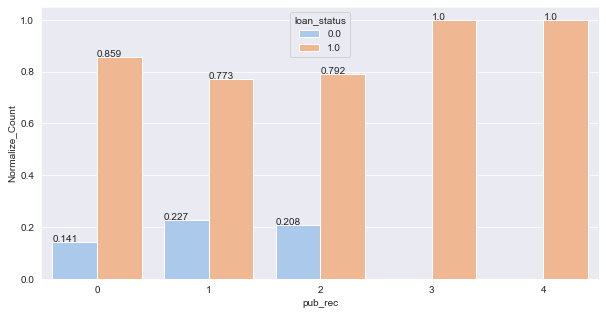

In [55]:
plt.figure(figsize=(10,5))
pub_rec=loan_data.groupby('pub_rec').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
pub_rec_bar=sns.barplot(data=pub_rec, x='pub_rec', y='Normalize_Count', hue='loan_status')
for i in pub_rec_bar.patches :
    pub_rec_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='medium')
plt.show()

### purpose

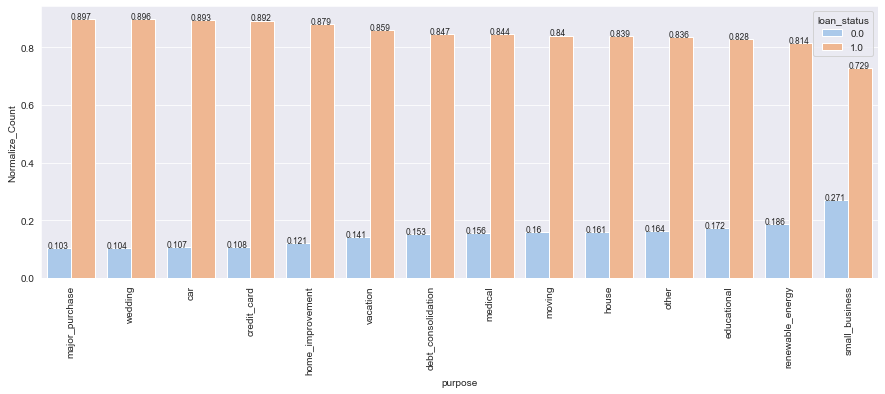

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
purpose=loan_data.groupby('purpose').loan_status.value_counts(normalize=True).sort_values().reset_index(name='Normalize_Count')
purpose_bar=sns.barplot(data=purpose, x='purpose', y='Normalize_Count', hue='loan_status')
for i in purpose_bar.patches :
    purpose_bar.annotate(str(round(i.get_height(),3)), (i.get_x(), i.get_height()) , fontsize='small')
plt.show()

___loan for small business are most likly to get default___

### dti

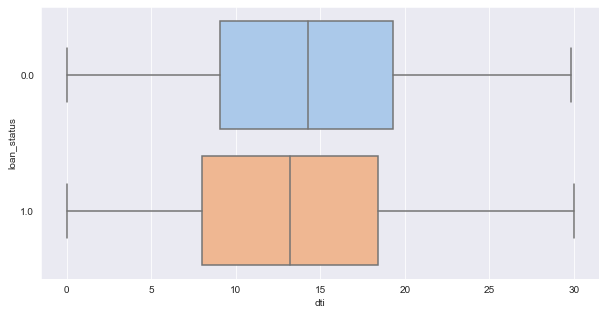

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data, y='loan_status', x='dti', orient='h')
plt.show()

___Most of the defaulter have higher dti___

### earliest_cr_line

In [58]:
print(loan_data.earliest_cr_line.head())
print(60*'*')
print('Unique values :',loan_data.earliest_cr_line.nunique())

0    Jan-85
1    Apr-99
2     1-Nov
3    Feb-96
5     4-Nov
Name: earliest_cr_line, dtype: object
************************************************************
Unique values : 524


In [59]:
loan_data.earliest_cr_line=pd.DatetimeIndex(loan_data.earliest_cr_line.apply(lambda x: x.replace('-','-20') if x[4]=='0' else x.replace('-','-19')))

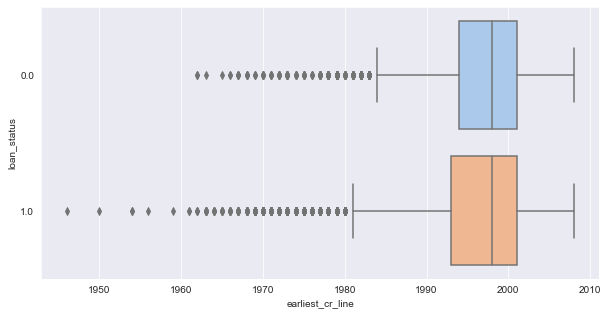

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data, y='loan_status', x=loan_data.earliest_cr_line.apply(lambda x: int(x.year)), orient='h')
plt.show()

___We assume that defaulters may have recent earliest credit line, but there is no such effect of earliest credit line.___

### Bivariate Analysis

###### loan_amnt and annual_inc

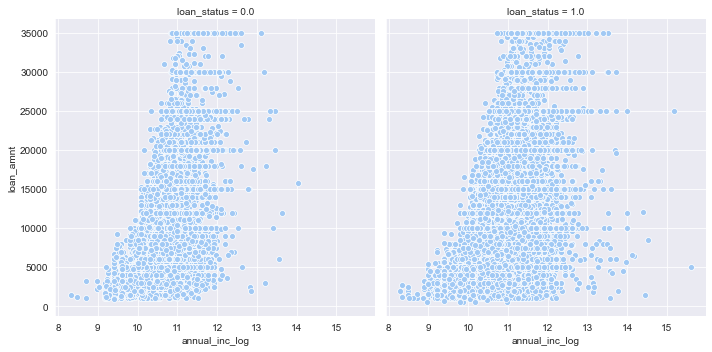

In [61]:
ax=sns.FacetGrid(data=loan_data, col='loan_status', aspect=1, height=5)
ax.map(sns.scatterplot, 'annual_inc_log', 'loan_amnt')
plt.show()

___Those people having average income lower than 50000 taking loans of 25000 or higher. The chance of defaulting of loan.___

###### annual income vs home_ownership vs emp_length

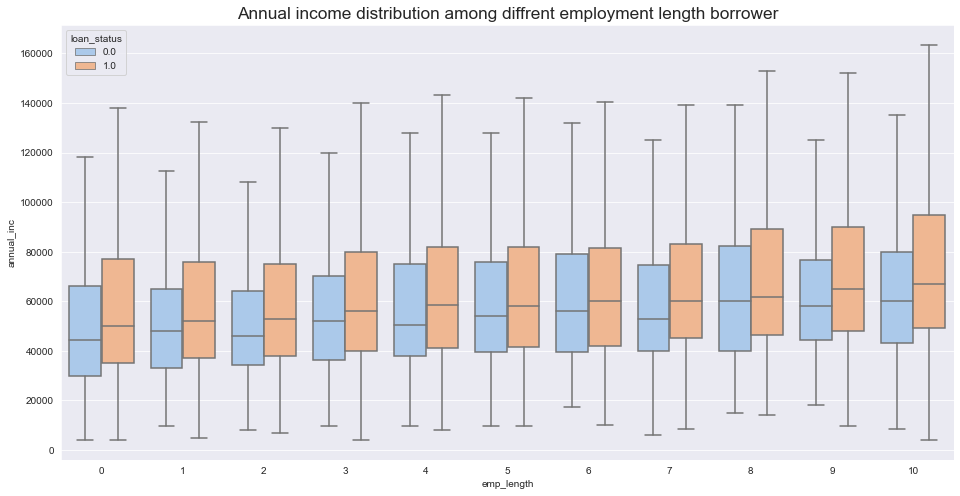

In [62]:
plt.figure(figsize=(16,8))
sns.boxplot(data=loan_data, x='emp_length', y='annual_inc', hue='loan_status', showfliers=False)
plt.title('Annual income distribution among diffrent employment length borrower',fontdict={'fontsize' : 'xx-large'})
plt.show()

___In individual employment length group defaulters income range is less.___

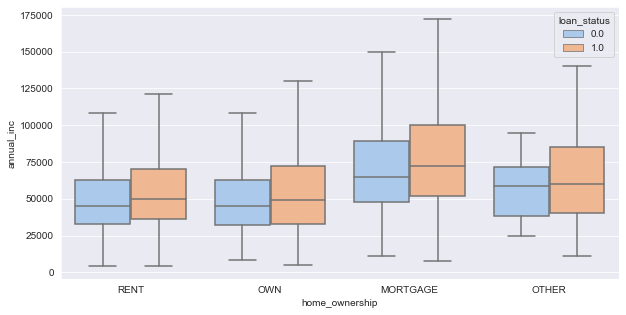

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data, x='home_ownership', y='annual_inc', hue='loan_status', showfliers=False)
plt.show()

___Just like emp_length, In individual group of home_ownership defaulters income range is less.___

###### loan_amnt vs verification_status vs loan status

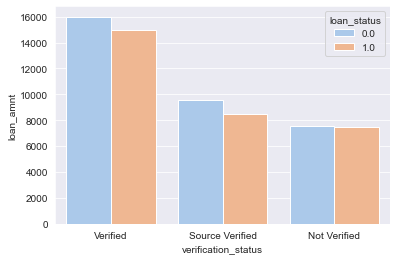

In [64]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.median, ci=None)
plt.show()

___Higher loans even with verified status are defaulter. So, Higher the loan amount has large risk of defaulting the loan.___

#### Interest Rate and Term and Loan Status

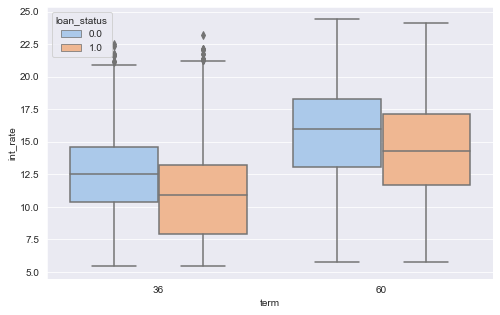

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(x='term', y='int_rate', hue="loan_status", data=loan_data)
plt.show()

___Interest_rate depends upon term. Higher the term value higher the interest_rate. As in previous result of univairate analysis of interest_rate and term higher the terms & int_rate, higher the chance of defaulting the loan.___

#### Loan amount vs Grade vs Loan Status

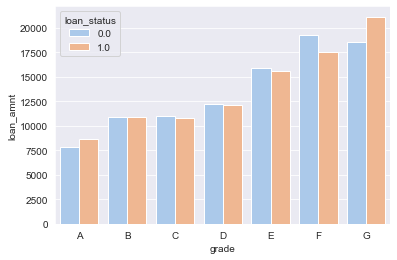

In [66]:
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean, ci=None, order=sorted(loan_data.grade.unique()))
plt.show()

___Higher the loan_amount with low grade i.e. F & G having chances for default. So, this combination could defaulting the loan.___ 

#### Loan amount Vs addr_state vs loan Status

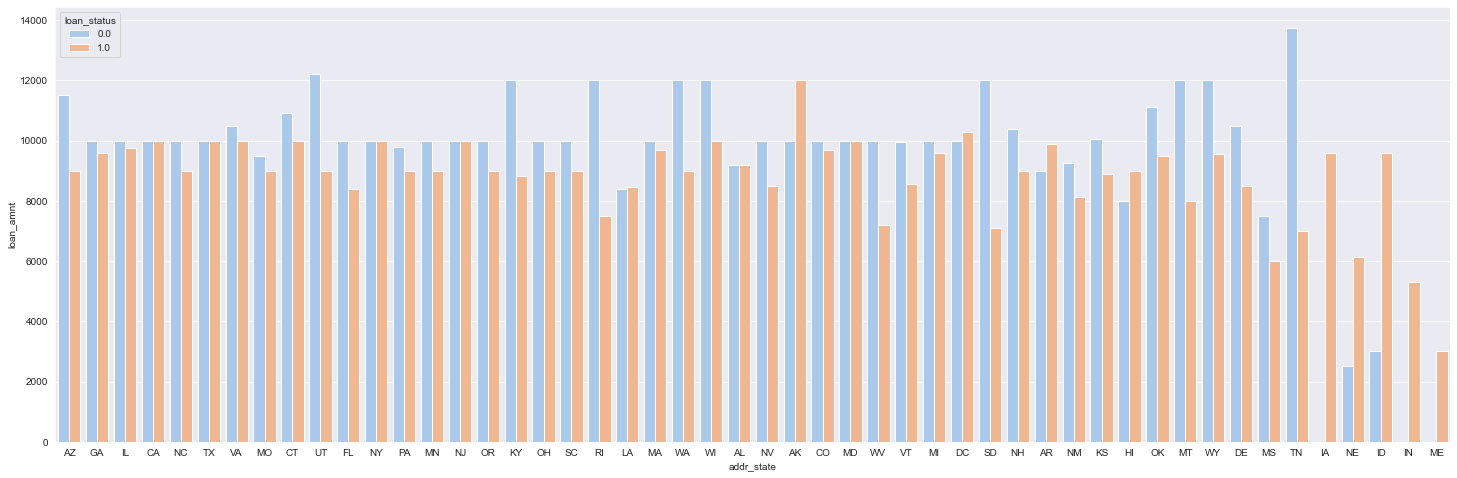

In [67]:
plt.figure(figsize=(25,8))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_data, estimator=np.median, ci=None)
plt.show()

___WY,MT,TN states have the highest average loan amount that was defaulting the loan.___

####  delinq_2yr VS loan amount VS grade

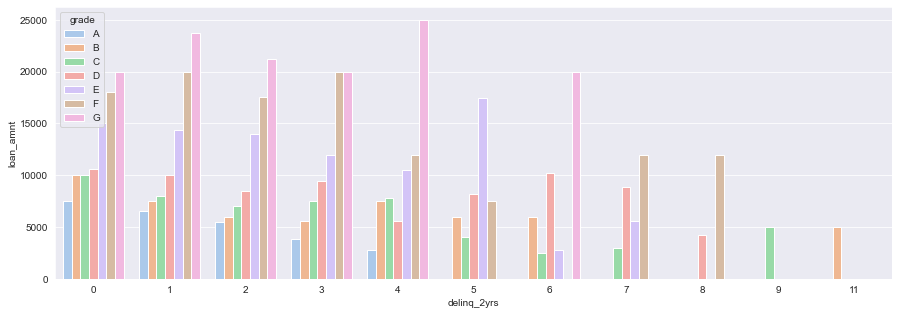

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_data, estimator=np.median, ci=None, hue_order =sorted(loan_data.grade.unique()))
plt.show()

___Higher the delinq_2yrs > 1 with higher loan_amnt has lower the grades. Which shows that this combination could be risky.___

## Recommendations

There are some factors which gives us the probablity of loan defaulting :<br>
some of them are as follows as per __given dataset__
1. Loan Amount
2. Annual Income
3. Interest rate
4. Term
5. Home Ownership
6. Employment Length
7. pub_rec_bankruptcies
8. purpose
9. pub_rec
10. dti

what we can do ?
1. we can extract the probablity of loan defaulting using driving factors.
2. Based on the risk, we can either accept or reject the loan.